In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pickle

In [1]:
!python -m venv venv

!venv/bin/python -m pip install uv
!venv/bin/python -m uv pip sync uv.lock

  Obtaining dependency information for uv from https://files.pythonhosted.org/packages/4c/4a/d5357825bb47ff73762d247b1a553a966fef6802e3ab829fe60934cbf339/uv-0.9.9-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 26.5 MB/s eta 0:00:000m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Using Python 3.12.1 environment at: venv
Resolved 21 packages in 85ms                                         
Prepared 21 packages in 6.20s                                            
░░░░░░░░░░░░░░░░░░░░ [0/21] Installing wheels...                                warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--li

In [2]:
df = pd.read_csv('heart_disease.csv')
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [3]:
print(df.isnull().sum())

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


In [4]:
#The alcohol consumption column is dropped due to too many missing value
df.drop('Alcohol Consumption', axis=1, inplace=True)

In [5]:
#Replace null with median for numerical column
numerical_cols_with_nulls = [
    'Age', 'Blood Pressure', 'Cholesterol Level', 'BMI',
    'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
    'Homocysteine Level', 'Sleep Hours'
]

for col in numerical_cols_with_nulls:
    if col in df.columns:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

In [6]:
#Replace null with mode for categorical
categorical_cols_with_nulls = [
    'Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes',
    'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
    'Stress Level', 'Sugar Consumption'
]

for col in categorical_cols_with_nulls:
    if col in df.columns:
        mode_val = df[col].mode()[0] 
        df[col] = df[col].fillna(mode_val)

In [7]:
print(df.isnull().sum())

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64


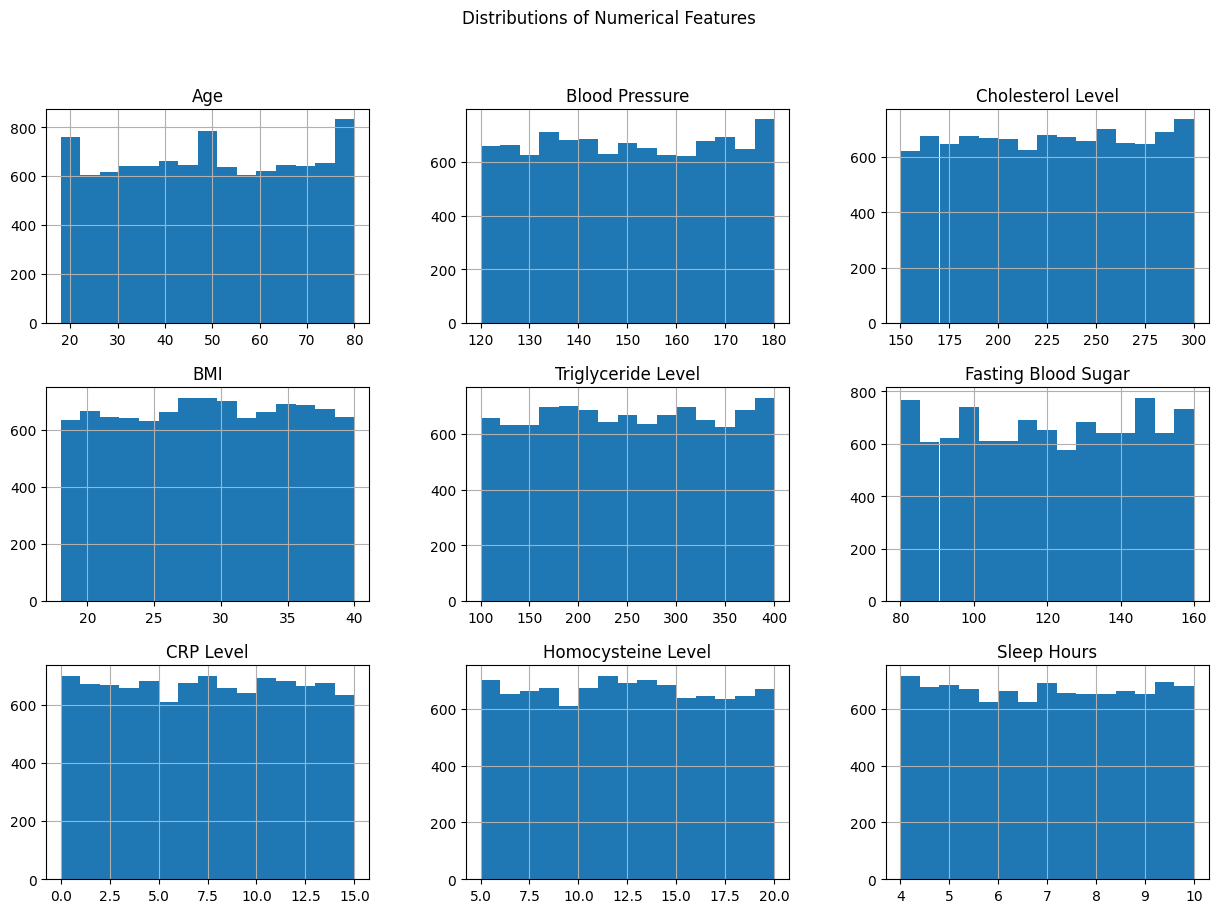

In [8]:
# Explore the distribution of numerical features
numerical_features = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level', 'Sleep Hours']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distributions of Numerical Features')
plt.show()

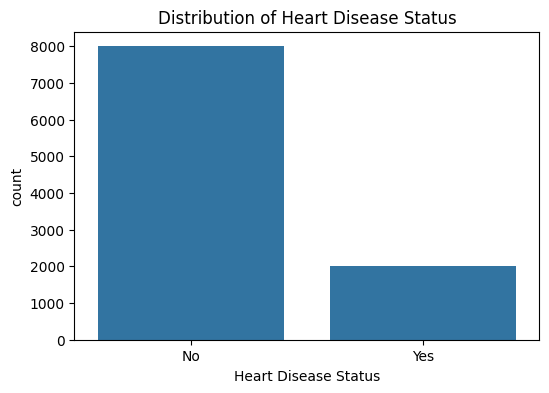

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease Status', data=df)
plt.title('Distribution of Heart Disease Status')
plt.show()

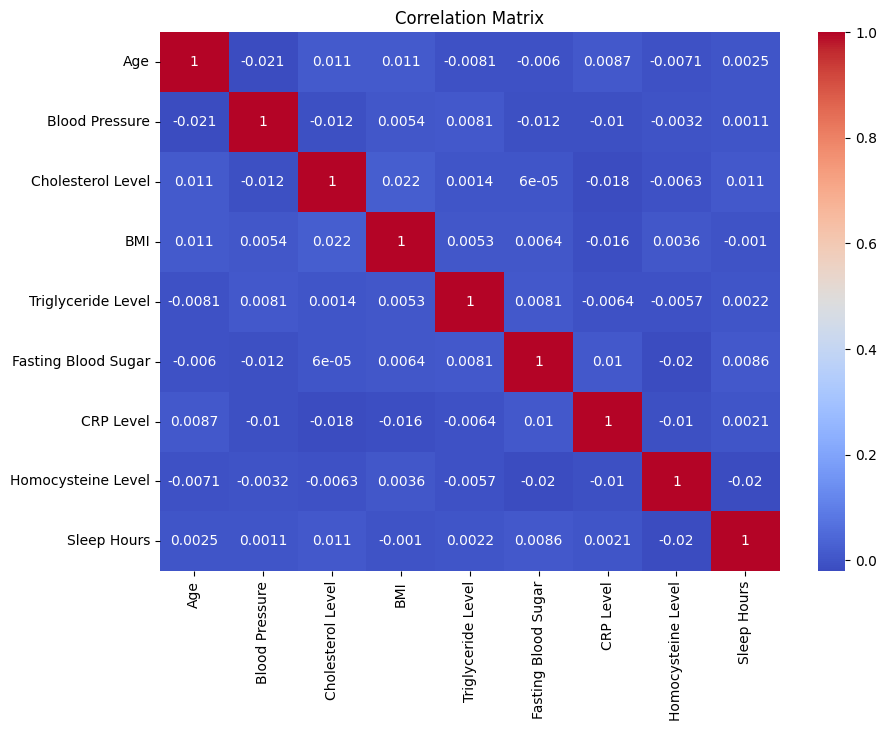

In [10]:
# Explore correlations between numerical features
plt.figure(figsize=(10, 7))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# convert categorical column to numerical
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('Heart Disease Status_Yes', axis=1)
y = df_encoded['Heart Disease Status_Yes']

In [12]:
# Train a simple Random Forest model to find important features
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
# Get feature importances
importances = pd.Series(model_rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

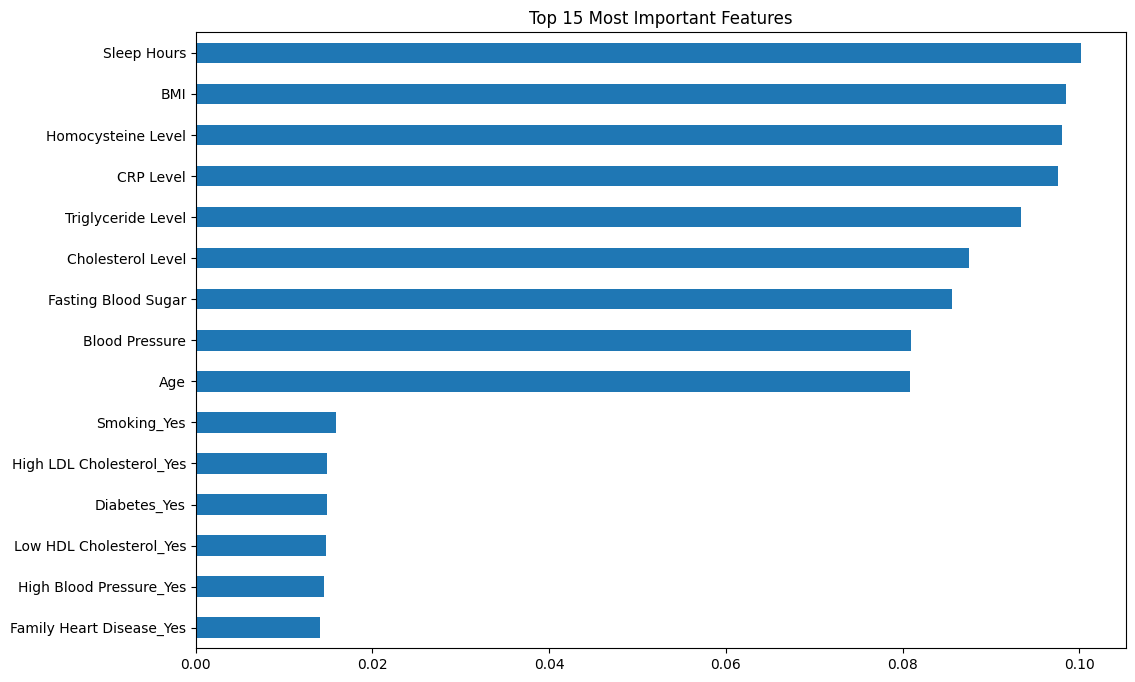

In [14]:
# Plot the most important features
plt.figure(figsize=(12, 8))
importances.head(15).plot(kind='barh')
plt.title('Top 15 Most Important Features')
plt.gca().invert_yaxis()
plt.show()

In [15]:
#rename the status column
df.rename(columns={'Heart Disease Status': 'status'}, inplace=True)
df['status'] = df['status'].apply(lambda x: 'default' if x == 'Yes' else 'no_default')

In [16]:
#split data
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [19]:
del df_train['status']
del df_val['status']
del df_test['status']

In [20]:
print(f"Training data shape: {df_train.shape}")
print(f"Validation data shape: {df_val.shape}")
print(f"Test data shape: {df_test.shape}")

Training data shape: (6000, 19)
Validation data shape: (2000, 19)
Test data shape: (2000, 19)


In [21]:
!pip install xgboost

In [22]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

In [23]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [24]:
#logistic regression
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict_proba(X_val)[:, 1]
auc_lr = roc_auc_score(y_val, y_pred_lr)
print(f"\nLogistic Regression Validation AUC: {auc_lr:.4f}")


Logistic Regression Validation AUC: 0.5139


In [25]:
#parameter tuning lr
best_lr_score = -1
best_c = None
for c_param in [0.01, 0.1, 1.0, 10.0, 100.0]:
    lr = LogisticRegression(C=c_param, solver='liblinear', random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"C={c_param}, AUC={auc:.4f}")
    if auc > best_lr_score:
        best_lr_score = auc
        best_c = c_param
print(f"\nBest AUC for Logistic Regression = {best_lr_score:.4f} (with C={best_c})\n")

C=0.01, AUC=0.5225
C=0.1, AUC=0.5174
C=1.0, AUC=0.5139
C=10.0, AUC=0.5150
C=100.0, AUC=0.5126

Best AUC for Logistic Regression = 0.5225 (with C=0.01)



In [26]:
#random forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_val)[:, 1]
auc_rf = roc_auc_score(y_val, y_pred_rf)
print(f"Random Forest Validation AUC: {auc_rf:.4f}")

Random Forest Validation AUC: 0.5028


In [27]:
#parameter tuning rf
best_rf_score = -1
best_rf_params = {}
for depth in [5, 10, 20]:
    for n_est in [100, 150, 200]:
        rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print(f"max_depth={depth}, n_estimators={n_est}, AUC={auc:.4f}")
        if auc > best_rf_score:
            best_rf_score = auc
            best_rf_params = {'max_depth': depth, 'n_estimators': n_est}
print(f"\nBest AUC for Random Forest = {best_rf_score:.4f} (with {best_rf_params})\n")

max_depth=5, n_estimators=100, AUC=0.4981
max_depth=5, n_estimators=150, AUC=0.5059
max_depth=5, n_estimators=200, AUC=0.5064
max_depth=10, n_estimators=100, AUC=0.5028
max_depth=10, n_estimators=150, AUC=0.5152
max_depth=10, n_estimators=200, AUC=0.5071
max_depth=20, n_estimators=100, AUC=0.4943
max_depth=20, n_estimators=150, AUC=0.4992
max_depth=20, n_estimators=200, AUC=0.5067

Best AUC for Random Forest = 0.5152 (with {'max_depth': 10, 'n_estimators': 150})



In [28]:
#xgboost
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict_proba(X_val)[:, 1]
auc_xgb = roc_auc_score(y_val, y_pred_xgb)
print(f"XGBoost Validation AUC: {auc_xgb:.4f}")

XGBoost Validation AUC: 0.5003


In [29]:
#parameter tuning xgb
best_xgb_score = -1
best_xgb_params = {}
for lr in [0.01, 0.1, 0.3]:
    for depth in [3, 5, 7]:
        xgb = XGBClassifier(learning_rate=lr, max_depth=depth, n_estimators=150,
                            random_state=42, eval_metric='logloss')
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print(f"learning_rate={lr}, max_depth={depth}, AUC={auc:.4f}")
        if auc > best_xgb_score:
            best_xgb_score = auc
            best_xgb_params = {'learning_rate': lr, 'max_depth': depth, 'n_estimators': 150}
print(f"\nBest AUC for XGBoost = {best_xgb_score:.4f} (with {best_xgb_params})\n")

learning_rate=0.01, max_depth=3, AUC=0.5108
learning_rate=0.01, max_depth=5, AUC=0.5209
learning_rate=0.01, max_depth=7, AUC=0.5146
learning_rate=0.1, max_depth=3, AUC=0.4926
learning_rate=0.1, max_depth=5, AUC=0.4976
learning_rate=0.1, max_depth=7, AUC=0.5042
learning_rate=0.3, max_depth=3, AUC=0.4924
learning_rate=0.3, max_depth=5, AUC=0.4974
learning_rate=0.3, max_depth=7, AUC=0.4963

Best AUC for XGBoost = 0.5209 (with {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150})



In [30]:
#logistic regression with c=0.01 has the best auc, so it is chosen

In [31]:
#final model
final_model = LogisticRegression(C=best_c, solver='liblinear', random_state=42)
final_model.fit(X_train, y_train)

test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

y_pred_test = final_model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_pred_test)

print(f"Final Model (Logistic Regression) Performance on Test Set")
print(f"Test AUC: {auc_test:.4f}")

Final Model (Logistic Regression) Performance on Test Set
Test AUC: 0.4750


In [32]:
!python train.py

Training the final model: Logistic Regression
Model artifacts successfully saved to 'heart_disease_model.pkl'


In [33]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [34]:
!python predict.py

Starting the prediction service on port 9696...
 * Serving Flask app 'heart-disease-prediction'
 * Debug mode: on
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:9696
 * Running on http://10.0.1.182:9696
Press CTRL+C to quit
 * Restarting with stat
Starting the prediction service on port 9696...
 * Debugger is active!
 * Debugger PIN: 133-622-446
^C
